Accuracy of KNN on winequality-red: 0.6125
Accuracy of KNN on winequality-white: 0.6619047619047619


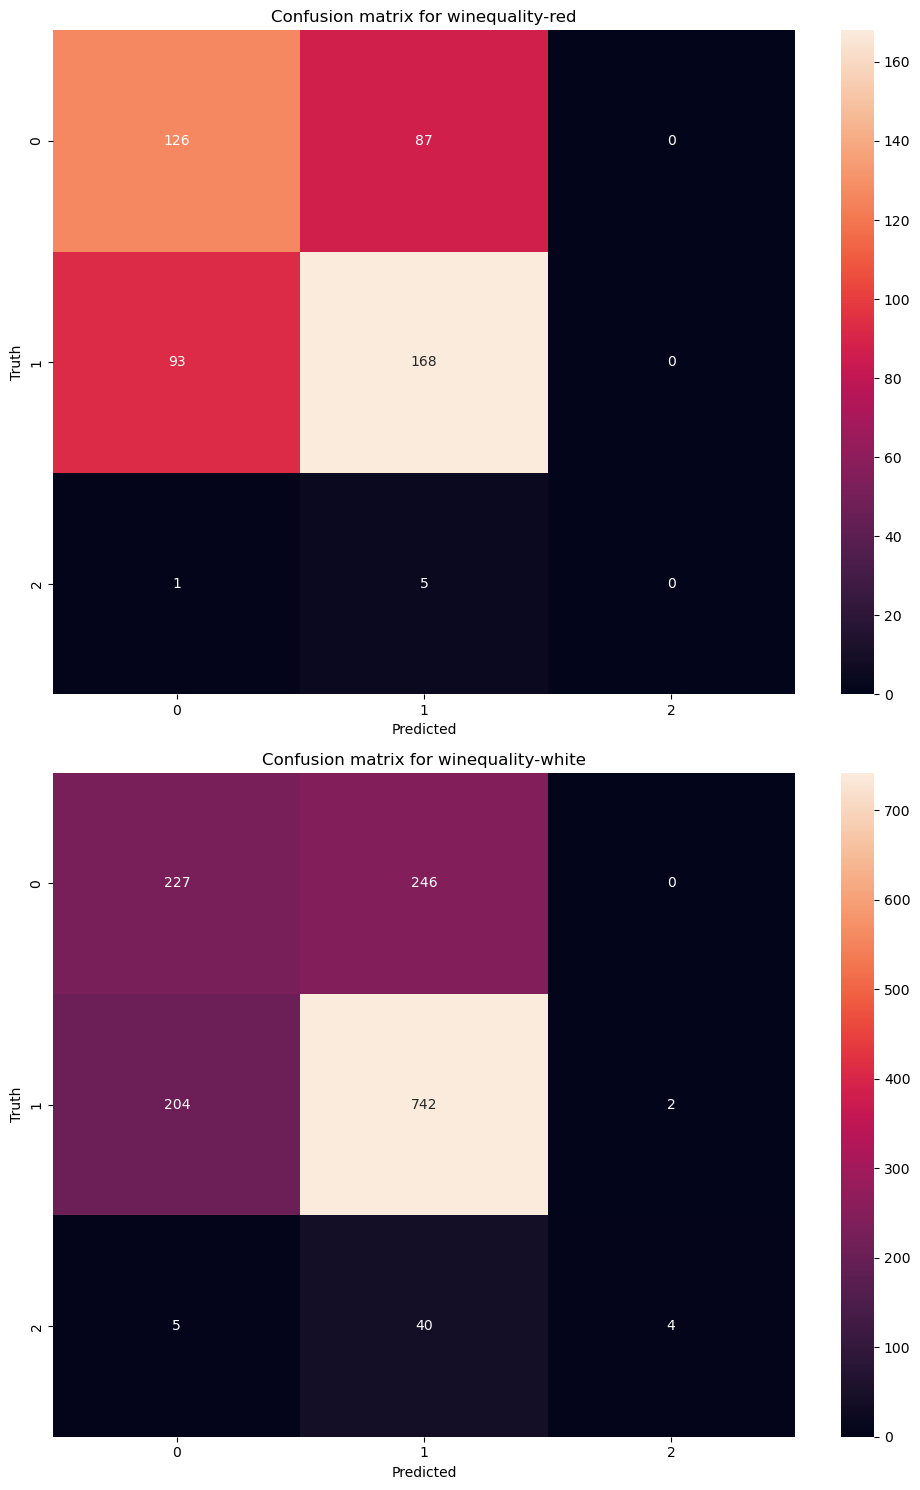

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 5, 7, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = KNeighborsClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Truth')
    axs[i].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

Accuracy of KNN on winequality-red: 0.6125
Accuracy of KNN on winequality-white: 0.6619047619047619


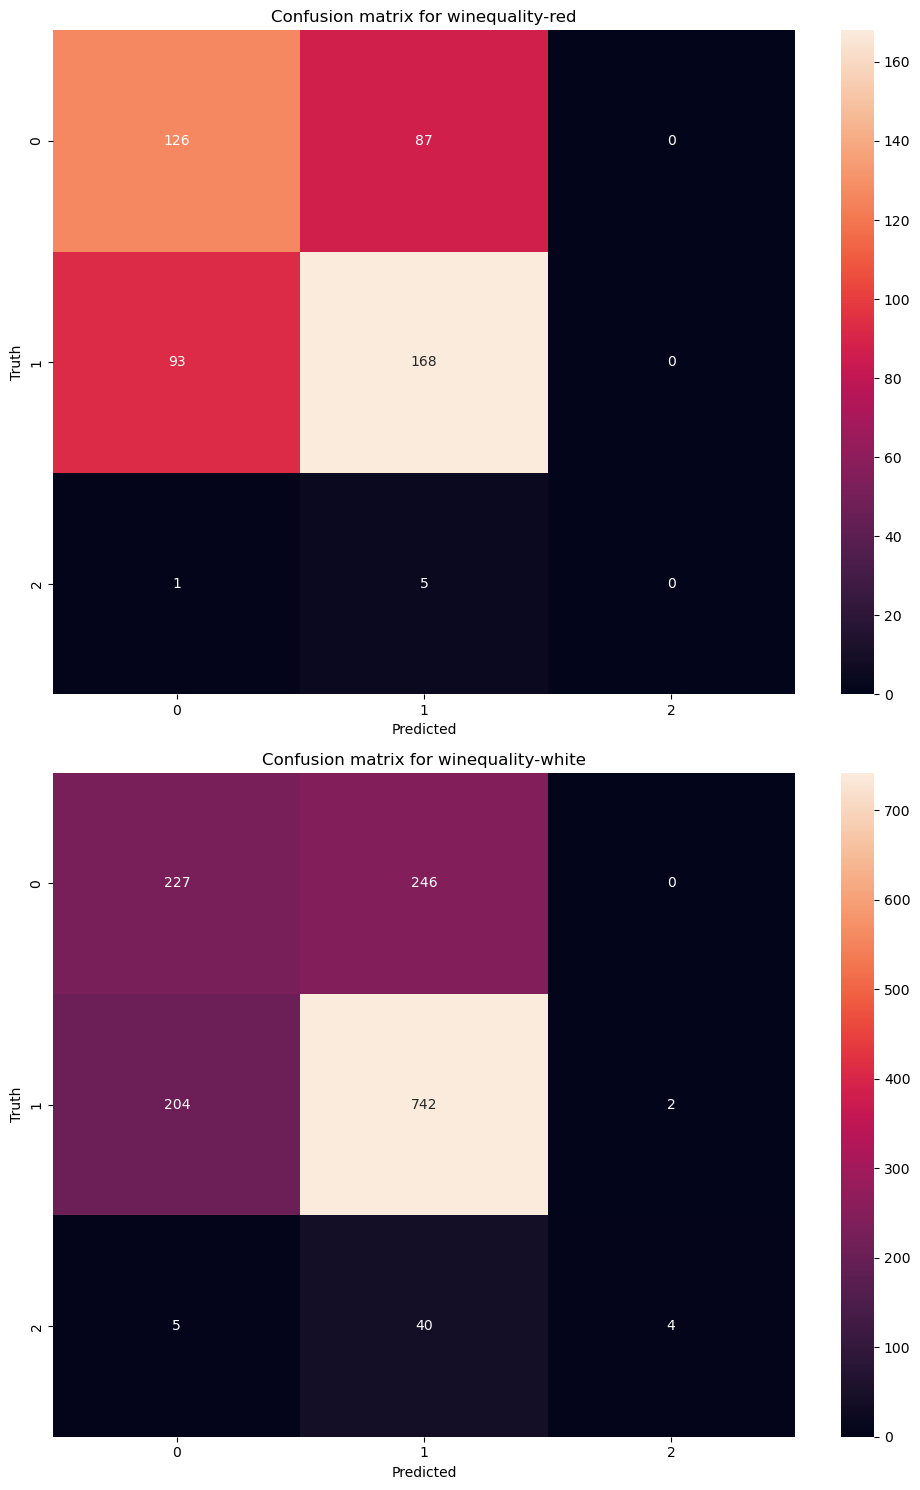

In [5]:
for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'density', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ['alcohol', 'density', 'free sulfur dioxide', 'residual sugar' ,'total sulfur dioxide']
    X = df[selected_columns]

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 5, 7, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = KNeighborsClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Truth')
    axs[i].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()